In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(-1.0, 1.0)

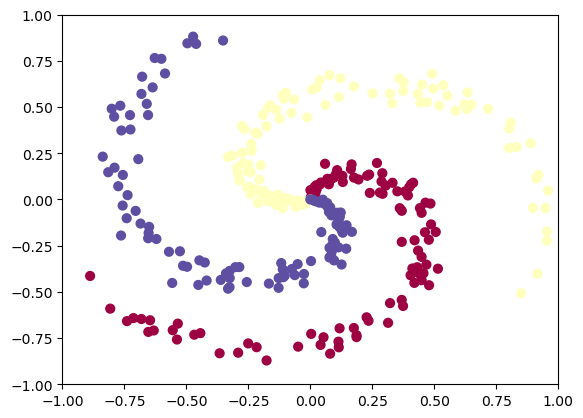

In [2]:
np.random.seed(0)

d = 2 # dimensionality
points_per_class = 100 # number of points per class
num_classes = 3 # number of classes

n = points_per_class*num_classes

X = np.zeros((n,d))
y = np.zeros(n, dtype='uint8')

for j in range(num_classes):

    inds = range(points_per_class*j, points_per_class*(j+1))

    # Generate radius and angle for each point
    r = np.linspace(0.0, 1, points_per_class) # radius
    t = np.linspace(j*4,(j+1)*4,points_per_class) + np.random.randn(points_per_class)*0.2 # theta

    X[inds] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[inds] = j  # class label

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])

In [3]:
h = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

X_test = np.c_[xx.ravel(), yy.ravel()]

def plot_model(scores):
    # Put the result into a color plot
    Z = scores.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

In [4]:
# ReLU: "rectified linear unit" nonlinearity
def relu(z):
    return np.maximum(0, z)

# Derivative of relu wrt its input (for backprop)
def relu_prime(z):
    return np.where(z > 0, 1, 0)

Iteration 1000: Loss = 0.2922783350038376
Iteration 2000: Loss = 0.25658793657703743
Iteration 3000: Loss = 0.24821728471460103
Iteration 4000: Loss = 0.24618247732063858
Iteration 5000: Loss = 0.2456668266883743
Iteration 6000: Loss = 0.24543719544729808
Iteration 7000: Loss = 0.24528125214352697
Iteration 8000: Loss = 0.24517695790067415
Iteration 9000: Loss = 0.245096000558628
Iteration 10000: Loss = 0.24503070844076638


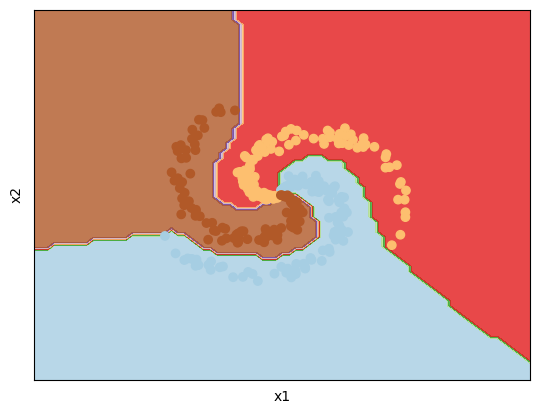

In [5]:
import autograd.numpy as np  # Thinly wrapped version of numpy
from autograd import grad


m  = 100 # size of hidden layer

# initialize weights with small random values and biases with zeros
W1 = np.random.randn(d, m) * 0.01
b1 = np.zeros(m)
W2 = np.random.randn(m, num_classes) * 0.01
b2 = np.zeros(num_classes)

# Select hyperparameters
iters      = 10000
step_size  = 1e-0
lambda_val = 1e-3 # regularization strength

'''
Do entire feed-forward computation and compute loss function
'''
def compute_loss(params):
    W1, b1, W2, b2 = params

    # Compute scores
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    scores = np.dot(A1, W2) + b2

    # Compute probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)   

    # Compute cross-entropy loss    
    correct_logprobs = -np.log(probs[range(n), y])
    data_loss = np.sum(correct_logprobs) / n    

    # Compute regularization loss
    reg_loss = 0.5 * lambda_val * (np.sum(W1 * W1) + np.sum(W2 * W2))  
    return data_loss + reg_loss


# Compute the gradient (vector of partial derivatives) of the entire feedforward training using grad function 
grad_loss = grad(compute_loss)

# Gradient descent loop
for i in range(iters):
    # Compute the gradients
    grads = grad_loss([W1, b1, W2, b2])

    # Update weights and biases using gradient descent
    W1 -= step_size * grads[0]
    b1 -= step_size * grads[1]
    W2 -= step_size * grads[2]
    b2 -= step_size * grads[3]

    # Print the loss every 1000 iterations
    if (i + 1) % 1000 == 0:
        loss = compute_loss([W1, b1, W2, b2])
        print(f"Iteration {i+1}: Loss = {loss}")
# predict on the test set and plot predictions using plot model

Z1_test = np.dot(X_test, W1) + b1
A1_test = relu(Z1_test)
scores_test = np.dot(A1_test, W2) + b2
probs_test = np.exp(scores_test) / np.sum(np.exp(scores_test), axis=1, keepdims=True)

# Plot the predictions
plot_model(np.argmax(probs_test, axis=1))

plt.show()
